# PCA on Olivetti Faces Dataset
## Overview
In this assignment, we explore Principal Component Analysis (PCA), a fundamental technique in machine learning for dimensionality reduction and feature extraction. We'll apply PCA to the Olivetti faces dataset to understand how it can be used to compress and reconstruct images.

## Objectives
1. Load and visualize the Olivetti faces dataset.
2. Perform PCA to reduce the dimensionality of the dataset.
3. Determine the optimal number of components using the elbow method.
4. Visualize the effect of PCA on image reconstruction.
5. Compare the performance of a model trained on the original dataset versus the PCA-reduced dataset.

## Prerequisites
Basic understanding of Python and NumPy.
Familiarity with matplotlib for plotting.
Basic knowledge of machine learning concepts, especially PCA.

## Step 1: Load and Visualize the Dataset


In [58]:
# Import necessary libraries
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

# Load the Olivetti faces dataset
faces = fetch_olivetti_faces()
X, y = faces['data'], faces['target']

In [59]:
# Print the shape of the dataset
print(X.shape)

(400, 4096)


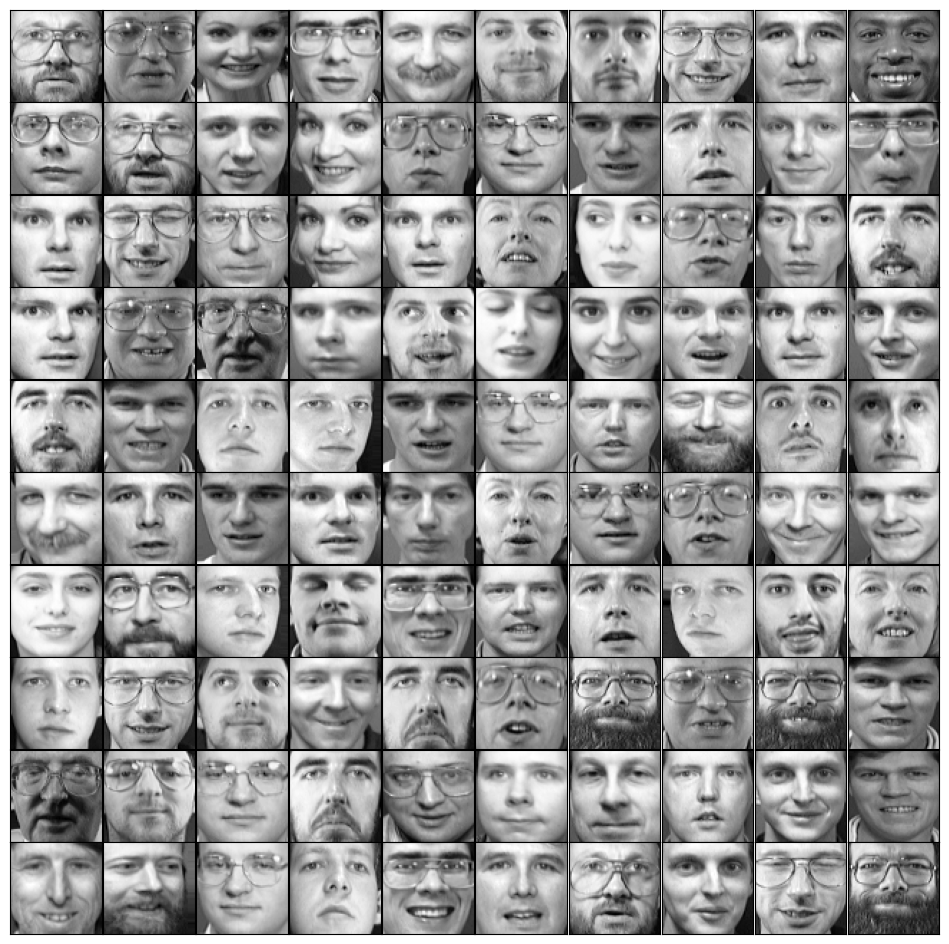

In [14]:
# Select 100 faces randomly for visualization
np.random.seed(0)  # Ensure reproducibility
X_samples = np.random.permutation(X)[:100]

# Plot the selected faces
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.subplots_adjust(hspace=0.01, wspace=0.01)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_samples[i].reshape((64, 64)), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## Step 2: Apply PCA on the Dataset
### Task
* Implement PCA on the dataset.
* Visualize the variance explained by each principal component.

In [46]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

# Apply PCA on the dataset (leave number of components blank)
# YOUR CODE HERE
pca = PCA()
pca.fit_transform(X)


array([[-6.4326015e+00, -7.0367610e-01, -1.4300221e+00, ...,
         2.6565135e-02,  9.4174733e-03,  9.8711398e-06],
       [-1.0759081e+00, -6.6973205e+00,  1.8428113e+00, ...,
        -3.9321170e-04, -1.0405174e-02,  9.8716246e-06],
       [-5.2929502e+00, -1.5425115e+00,  2.2595391e-01, ...,
        -2.4333077e-02, -7.9373838e-03,  9.8716155e-06],
       ...,
       [ 2.0407634e+00, -1.5096111e+00,  3.4487305e+00, ...,
         2.1402279e-02, -3.7092073e-03,  9.8708651e-06],
       [-5.1652198e+00,  8.0967569e+00, -6.7101020e-01, ...,
        -8.2226647e-03,  1.6308963e-02,  9.8710016e-06],
       [-1.1505017e+00,  2.4350331e+00,  1.1894920e+00, ...,
         1.1125655e-02,  2.7803987e-02,  9.8713126e-06]], dtype=float32)

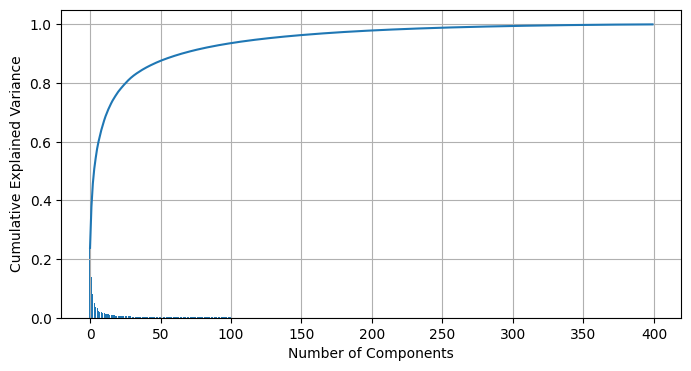

In [12]:
# Visualize the variance explained by each principal component

plt.figure(figsize=(8, 4))
plt.bar(np.arange(400), pca.explained_variance_ratio_ )
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

## Step 3: Elbow Method for Optimal Components
### Task
* Plot the cumulative explained variance against the number of components.
* Use the elbow method to determine a good number of components for PCA.

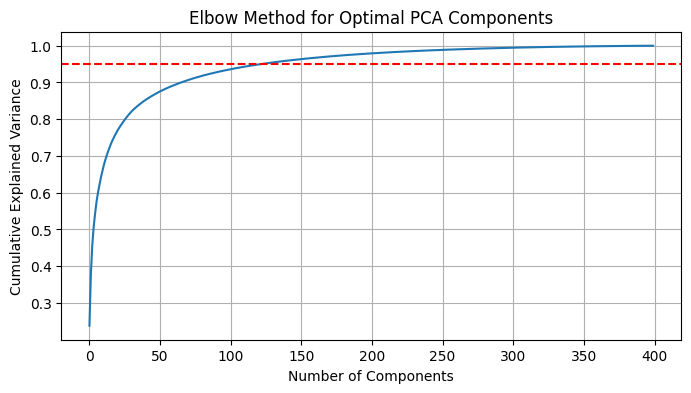

In [47]:
# YOUR CODE HERE
# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_ ))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Optimal PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--') # Example threshold line at 95% variance
plt.grid(True)
plt.show()


## Step 4: Image Reconstruction
### Task
* Reconstruct images using the selected number of PCA components.
* Plot original and reconstructed images side-by-side.

In [48]:
# YOUR CODE HERE for "Reconstruction": use "X_reconstructed"
X_reconstructed = pca.inverse_transform(pca.fit_transform(X))

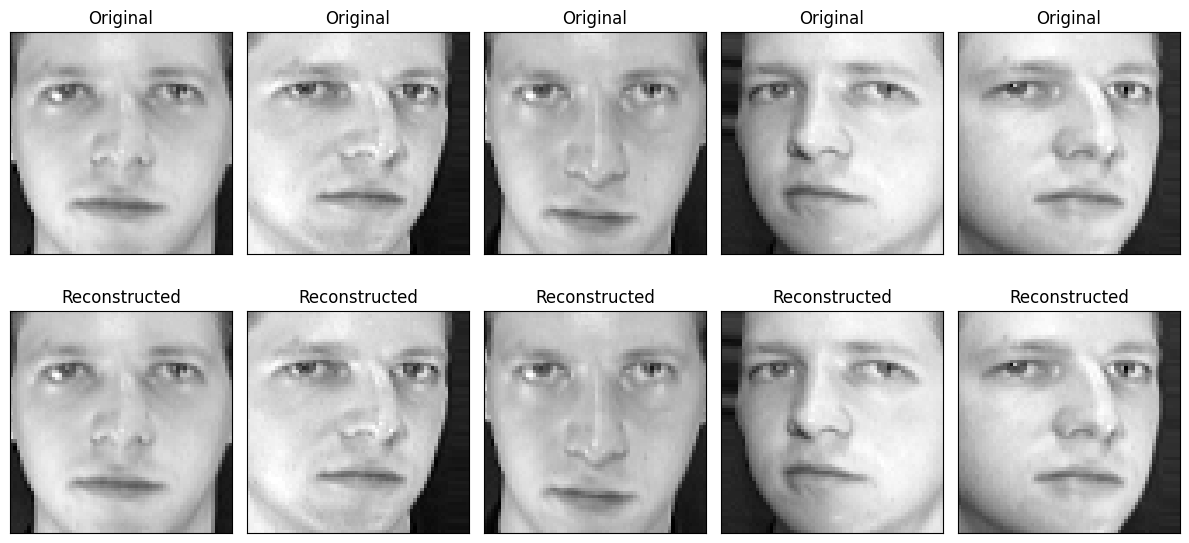

In [49]:
# Plot original and reconstructed images side-by-side
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    # Original Image
    ax = axes[0, i]
    ax.imshow(X[i].reshape(64, 64), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("Original")

    # Reconstructed Image
    ax = axes[1, i]
    ax.imshow(X_reconstructed[i].reshape(64, 64), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("Reconstructed")

plt.tight_layout()
plt.show()

## Step 5: Compare Models
### Task
* Train a model using the original dataset and the PCA-reduced dataset.
* Compare the performance of the two models.

In [64]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
# your ML model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model on the original dataset
model_original = LogisticRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Train a model on the PCA-reduced dataset
X_train_pca, X_test_pca = pca.transform(X_train), pca.transform(X_test)
model_pca = SVC()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Print the accuracy of both models
print(f"Accuracy with original data: {accuracy_original}")
print(f"Accuracy with PCA-reduced data: {accuracy_pca}")


Accuracy with original data: 0.95
Accuracy with PCA-reduced data: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Conclusion
In this assignment, you've learned how to apply PCA on image data, how to choose the number of components, and the effects of PCA on image reconstruction and model performance. This exercise helps in understanding the balance between data reduction and information retention, which is crucial in many machine learning applications.

